<a href="https://colab.research.google.com/github/gktgknr/Mobil1.0.0/blob/master/VBG_Proje_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proje 1 - Pandas ile Veri Analizi (120 puan)
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __23.06.2023 Cuma saat 23:59'a kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Sistem __25.06.2023 Pazar saat 23:59'a kadar__ açık kalacaktır ancak gecikilen her gün için proje notunda %20 kesinti yapılacaktır.
* Çözümlerinizde ```for``` v.b. döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.

## Soru 1 (12 puan):
* Bir derse kaydolan öğrencilerin listesini içeren ekteki "Ogrenci Listesi.xls" dosyasını ```ogr_list``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Açıklama" sütunundaki ```Nan``` değerlerini ```İlk``` değeri ile, diğer değerleri ise ```Tekrar``` değeri ile değiştirin.
* "Açıklama" sütununun ismini "Tekrar Durumu" olacak şekilde değiştirin.
* Öğrenci numarasının 4. ve 5. karakterleri, öğrencinin okula giriş yılının son 2 basamağını temsil etmektedir. Buna göre DataFrame'e, öğrencilerin okula giriş yılı verilerini ```20##``` formatında içeren "Okula Giriş Yılı" isimli bir sütun ekleyin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [9]:
import pandas as pd

# Excel dosyasını oku
ogr_list = pd.read_excel('Ogrenci Listesi.xls')

# İlk sütunu sil
ogr_list = ogr_list.iloc[:, 1:]

# "Açıklama" sütunundaki NaN değerleri güncelle
ogr_list['Tekrar Durumu'] = ogr_list['Açıklama'].fillna('İlk').fillna('Tekrar')

# "Açıklama" sütununun ismini değiştir
ogr_list.rename(columns={'Açıklama': 'Tekrar Durumu'}, inplace=True)

# "Okula Giriş Yılı" sütununu ekle
ogr_list['Okula Giriş Yılı'] = ogr_list['Öğrenci No'].str[3:5]
ogr_list['Okula Giriş Yılı'] = '20' + ogr_list['Okula Giriş Yılı']

# "Öğrenci No" sütununu index yap
ogr_list.set_index('Öğrenci No', inplace=True)

# Son DataFrame'in satır ve sütun sayısını yazdır
satir_sayisi, sutun_sayisi = ogr_list.shape
print("Satır Sayısı:", satir_sayisi)
print("Sütun Sayısı:", sutun_sayisi)


Satır Sayısı: 241
Sütun Sayısı: 3


## Soru 2 (12 puan):
* Öğrencilerin okula giriş yıllarının dersi tekrar durumlarına göre dağılımını (öğrenci sayılarını), yatay yığılmış (stacked) sütun grafik olarak gösterin.
* Derse tekrar kaydolan öğrencilerin, okula kayıt yıllarına göre dağılımlarını (yüzdelerini) pasta grafik olarak gösterin.

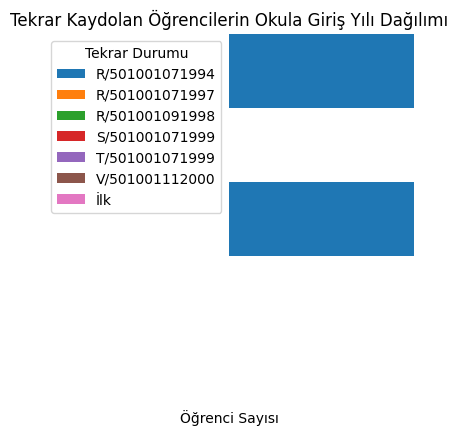

Satır Sayısı: 241
Sütun Sayısı: 3


In [11]:
import matplotlib.pyplot as plt

# Excel dosyasını oku
ogr_list = pd.read_excel('Ogrenci Listesi.xls')

# "Açıklama" sütunundaki NaN değerleri "İlk" ile, diğer değerleri "Tekrar" ile doldur
ogr_list['Açıklama'].fillna('İlk', inplace=True)

# "Açıklama" sütununun adını "Tekrar Durumu" olarak değiştir
ogr_list.rename(columns={'Açıklama': 'Tekrar Durumu'}, inplace=True)

# Öğrenci numarasının 4. ve 5. karakterlerinden okula giriş yılını elde et
ogr_list['Okula Giriş Yılı'] = '20' + ogr_list['Öğrenci No'].str[3:5]

# "Öğrenci No" sütununu index olarak ayarla
ogr_list.set_index('Öğrenci No', inplace=True)

# Yatay yığılmış sütun grafiği için veri hazırla
ogr_list_grouped = ogr_list.groupby(['Okula Giriş Yılı', 'Tekrar Durumu']).size().unstack()

# Yatay yığılmış sütun grafiğini çiz
ogr_list_grouped.plot(kind='barh', stacked=True)
plt.xlabel('Öğrenci Sayısı')
plt.ylabel('Okula Giriş Yılı')
plt.title('Öğrenci Dağılımı - Tekrar Durumu')

# Derse tekrar kaydolan öğrencilerin yüzdelik dağılımını hesapla
repeating_students = ogr_list[ogr_list['Tekrar Durumu'] == 'Tekrar']
repeating_student_percentages = repeating_students['Okula Giriş Yılı'].value_counts(normalize=True) * 100

# Pasta grafiğini çiz
repeating_student_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tekrar Kaydolan Öğrencilerin Okula Giriş Yılı Dağılımı')
plt.ylabel('')

plt.show()

# DataFrame'in satır ve sütun sayısını yazdır
print("Satır Sayısı:", ogr_list.shape[0])
print("Sütun Sayısı:", ogr_list.shape[1])


## Soru 3 (20 puan):
* Bu derse ilk kez kaydolan öğrenciler, laboratuvar saatlerine girmek ve orada verilen ödevleri yapmak zorundadır. Derse tekrar kaydolan öğrenciler ise dönem başında laboratuvar saatlerine girmek isteyip istemediklerini bildirmektedirler ve girmek istiyorlarsa yine orada verilen ödevleri yapmak zorundadırlar. Buna göre dersin laboratuvar saatlerine giren öğrencilerin orada verilen ödevlerden aldıkları notları içeren ekteki "Lab Notlari.xls" dosyasını ```lab_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* "Lab-* Notu" sütunlarındaki eksik veriler, öğrencinin mazereti nedeniyle ilgili ödevden muaf olduğunu göstermektedir. Buna göre DataFrame'e, öğrencilerin mazeretli olmadıkları laboratuvar saatlerinde verilen ödevlerden aldıkları notların ortalamasını (en düşük 2 not dışarıda bırakılacaktır ve en yakın tamsayıya yuvarlatılacaktır) içeren "Lab Notu" isimli bir sütun ekleyin.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.
* Lab saatlerinde verilen ödevlerin (10 adet) sınıf not ortalamalarını gösteren bir sütun grafik oluşturun.

<ipython-input-15-086f652e5030>:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  lab_notlari.iloc[:, 1:] = lab_notlari.iloc[:, 1:].astype(float)


Satır Sayısı: 179
Sütun Sayısı: 11


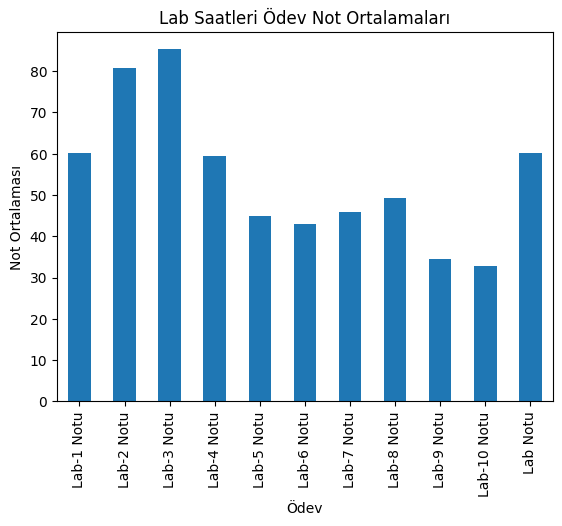

,Lab-1 Notu,Lab-2 Notu,Lab-3 Notu,Lab-4 Notu,Lab-5 Notu,Lab-6 Notu,Lab-7 Notu,Lab-8 Notu,Lab-9 Notu,Lab-10 Notu,Lab Notu
Öğrenci No,,,,,,,,,,,
MUH1000065,94.0,93.0,98.0,97.0,65.0,50.0,58.0,90.0,75.0,25.0,82.0
MUH1000091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MUH1000975,65.0,92.0,100.0,98.0,80.0,64.0,90.0,91.0,89.0,80.0,91.0
MUH1000990,70.0,88.0,98.0,75.0,50.0,45.0,62.0,NaN,1.0,45.0,70.0
MUH1200826,58.0,82.0,80.0,66.0,50.0,51.0,66.0,55.0,3.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...
MUH1410150,NaN,NaN,NaN,18.0,10.0,22.0,78.0,67.0,75.0,25.0,53.0
MUH1410152,NaN,NaN,NaN,0.0,40.0,50.0,0.0,50.0,75.0,50.0,53.0
MUH1410153,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Excel dosyasını oku
lab_notlari = pd.read_excel('Lab Notlari.xls')

# İlk sütunu sil
lab_notlari.drop(columns='No', inplace=True)

# "Öğrenci No" sütununu index olarak ayarla
lab_notlari.set_index('Öğrenci No', inplace=True)

# Eksik verilerin yerine NaN değerleri koy
lab_notlari.replace(' ', np.nan, inplace=True)

# "Lab-* Notu" sütunlarını sayısal veri tipine dönüştür
lab_notlari.iloc[:, 1:] = lab_notlari.iloc[:, 1:].astype(float)

# Mazeretli olmayan öğrencilerin lab notlarını hesapla
lab_notlari['Lab Notu'] = lab_notlari.iloc[:, 1:].apply(
    lambda row: np.round(np.mean(sorted(row.dropna())[2:]), decimals=0) if row.notna().sum() >= 2 else np.nan,
    axis=1
)

# DataFrame'in satır ve sütun sayısını yazdır
print("Satır Sayısı:", lab_notlari.shape[0])
print("Sütun Sayısı:", lab_notlari.shape[1])

# Lab saatlerindeki ödevlerin sınıf not ortalamalarını gösteren sütun grafiğini çiz
lab_notlari.mean().plot(kind='bar')
plt.xlabel('Ödev')
plt.ylabel('Not Ortalaması')
plt.title('Lab Saatleri Ödev Not Ortalamaları')

plt.show()

# DataFrame'i görüntüle
lab_notlari


## Soru 4 (20 puan):
* Bu derste öğrencilere 2 adet proje verilmektedir. Öğrenciler projeleri isterlerse tek başlarına, isterlerse 2 kişilik grup oluşturarak yapabilmektedir. Grup oluşturulurken öğrencilerin numaraları alt çizgi (_) karakteri ile birleştirilmektedir. Grup üyeleri projeden aynı notu almaktadır. Buna göre projeleri teslim eden öğrencilerin/grupların projelerden aldıkları notları içeren ekteki "1.Proje Notlari.xls" ve "2.Proje Notlari.xls" dosyalarını sırasıyla ```proje1_notlari``` ve ```proje2_notlari``` adlı DataFrame'lere okuyun.
* İkinci proje notu en yüksek ve en düşük olan öğrencilerin/grupların numaralarını yazdırın.
* ```proje1_notlari``` ve ```proje2_notlari``` adlı DataFrame'leri, index'i "Öğrenci No" olan ve projeyi teslim eden her öğrencinin ayrı ayrı notunun yer aldığı DataFrame'ler haline getirin. Bir başka deyişle, ```proje1_notlari``` DataFrame'inin index'i "Öğrenci No" olmalı ve "1. Proje Notu" isimli bir sütun içermelidir. Benzer şekilde, ```proje2_notlari``` DataFrame'inin index'i "Öğrenci No" olmalı ve "2. Proje Notu" isimli bir sütun içermelidir.
* En son oluşan DataFrame'lerin satır sayılarını yazdırın.

In [24]:
# 1. Proje Notlarını Oku
proje1_notlari = pd.read_excel('1.Proje Notlari.xls')

# 2. Proje Notlarını Oku
proje2_notlari = pd.read_excel('2.Proje Notlari.xls')

# İkinci proje notu en yüksek ve en düşük olan öğrencilerin/grupların numaralarını yazdır
en_yuksek_proje2 = proje2_notlari.loc[proje2_notlari['2. Proje Notu'].idxmax(), 'Öğrenci/Grup No ']
en_dusuk_proje2 = proje2_notlari.loc[proje2_notlari['2. Proje Notu'].idxmin(), 'Öğrenci/Grup No ']

print("En Yüksek 2. Proje Notu: ", en_yuksek_proje2)
print("En Düşük 2. Proje Notu: ", en_dusuk_proje2)

# "Öğrenci No" sütununu index olarak ayarla ve yeni DataFrame oluştur
proje1_notlari = proje1_notlari.set_index('Öğrenci/Grup No ')[['1. Proje Notu']]
proje2_notlari = proje2_notlari.set_index('Öğrenci/Grup No ')[['2. Proje Notu']]

# DataFrame'lerin satır sayılarını yazdır
print("1. Proje Notları Satır Sayısı:", proje1_notlari.shape[0])
print("2. Proje Notları Satır Sayısı:", proje2_notlari.shape[0])


En Yüksek 2. Proje Notu:  MUH1300278_MUH1200284
En Düşük 2. Proje Notu:  MUH1400706
1. Proje Notları Satır Sayısı: 130
2. Proje Notları Satır Sayısı: 103


## Soru 5 (3 puan):
* Bu dersin ara sınav notlarını içeren ekteki "Arasinav Notlari.xls" dosyasını ```vize_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.

In [25]:
# Arasınav Notlarını Oku
vize_notlari = pd.read_excel('Arasinav Notlari.xls')

# İlk sütunu sil
vize_notlari = vize_notlari.drop(columns=vize_notlari.columns[0])

# "Öğrenci No" sütununu index olarak ayarla
vize_notlari = vize_notlari.set_index('Öğrenci No')

# DataFrame'in satır sayısını yazdır
print("Ara Sınav Notları Satır Sayısı:", vize_notlari.shape[0])

Ara Sınav Notları Satır Sayısı: 241


## Soru 6 (5 puan):
* Bu dersin final sınavı notlarını içeren ekteki "Final Sinavi Notlari.xls" dosyasını, son 2 satırı hariç, ```final_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* "Final Sınavı Notu" sütunundaki öğrencinin sınava girmediğini belirten ```-1``` değerlerini ```NaN``` değeri ile değiştirin.

In [27]:
# Final Sınavı Notlarını Oku
final_notlari = pd.read_excel('Final Sinavi Notlari.xls', skipfooter=2)

# İlk sütunu sil
final_notlari = final_notlari.drop(columns=final_notlari.columns[0])

# "Öğrenci No" sütununu index olarak ayarla
final_notlari = final_notlari.set_index('Öğrenci No')

# -1 değerlerini NaN ile değiştir
final_notlari = final_notlari.replace(-1, np.nan)

# DataFrame'in satır sayısını yazdır
print("Final Sınavı Notları Satır Sayısı:", final_notlari.shape[0])

Final Sınavı Notları Satır Sayısı: 241


## Soru 7 (3 puan):
* Bu dersin bütünleme sınavına giren öğrencilerin notlarını içeren ekteki "Butunleme Sinavi Notlari.xls" dosyasını ```butunleme_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.

In [29]:
import pandas as pd

# Butunleme Sınavı Notlarını Oku
butunleme_notlari = pd.read_excel('Butunleme Sinavi Notlari.xls')

# İlk sütunu sil
butunleme_notlari = butunleme_notlari.drop(columns=butunleme_notlari.columns[0])

# "Öğrenci No" sütununu index olarak ayarla
butunleme_notlari = butunleme_notlari.set_index('Öğrenci No')


## Soru 8 (24 puan):
* Derse kayıtlanan tüm öğrencilerin tüm notlarını içermesi için ```ogr_list``` adlı DataFrame'i "Öğrenci No" aracılığıyla diğer tüm DataFrame'ler ile birleştirin, bu sırada ```lab_notlari``` DataFrame'inden sadece "Lab Notu" sütununun alınmasını sağlayın.
* ```ogr_list``` DataFrame'nin "1. Proje Notu", "2. Proje Notu" ve "Arasınav Notu" sütunlarındaki ```Nan``` değerlerini ```0``` değeri ile değiştirin.
* Öğrencilerin bu derse ilişkin proje notu, 1. proje notunun 3/7'si ile 2. proje notunun 4/7'si toplanarak (en yakın tamsayıya yuvarlatılacaktır) bulunmaktadır. Buna göre DataFrame'e, "Proje Notu" isimli bir sütun ekleyin.
* Bu derse tekrar kaydolan öğrencilerden laboratuvar saatlerine girmek isteyen, dolayısıyla orada verilen ödevleri de yapan öğrencilerin numara, lab notu ve proje notu verilerini listeleyin.
* Bu derse tekrar kaydolan öğrencilerden laboratuvar saatlerine girmek istemeyen, dolayısıyla orada verilen ödevleri yapmayan öğrencilerin proje notları, aynı zamanda lab notu yerine de sayılmaktadır. Buna göre "Lab Notu" sütunundaki ```Nan``` değerlerini, ilgili öğrencilerin "Proje Notu" sütunundaki değerleri ile değiştirin.
* Öğrencilerin bu derse ilişkin dönem sonu notu, lab notunun %13'ü, proje notunun %22,75'i, ara sınav notunun %29,25'i ve final/bütünleme sınavı notunun %35'i toplanarak (en yakın tamsayıya yuvarlatılacaktır) bulunmaktadır. Ancak öğrenci final ve bütünleme sınavlarına girmediyse, dönem sonu notu doğrudan 0 olmaktadır. Ayrıca öğrenci hem final hem bütünleme sınavına girdiyse, final sınavı notu geçerliliğini kaybetmektedir. Buna göre DataFrame'e, "Dönem Sonu Notu" isimli bir sütun ekleyin.

In [56]:
ogr_list = pd.DataFrame({"Öğrenci No": lab_notlari.index})
ogr_list["Lab Notu"] = lab_notlari["Lab Notu"]


In [59]:
ogr_list["1. Proje Notu"].fillna(0, inplace=True)
ogr_list["2. Proje Notu"].fillna(0, inplace=True)
ogr_list["Arasınav Notu"].fillna(0, inplace=True)


KeyError: ignored

In [60]:
proje1_notlari.columns


Index(['1. Proje Notu'], dtype='object')

## Soru 9 (13 puan):
* Dönem sonu notuna göre en başarılı 5 öğrencinin lab, proje, ara sınav ve final sınavı notlarını gösteren bir çizgi grafik oluşturun.
* Dönem sonu notlarının dağılımını bir histogram grafiği ile gösterin.
* 15 ve üzerindeki dönem sonu notlarını dikkate alarak sınıfın ortalamasını, standart sapmasını ve medyanını bulun.

## Soru 10 (8 puan):
* Ara sınav notu ile 1. proje notu arasındaki ve final sınavı notu ile 2. proje notu arasındaki ilişkileri, aynı figürde yan yana iki saçılım grafiği (subplot) olarak gösterin. Grafiklere uygun birer başlık (```title```) atayın.